In [1]:
from datetime import date
from nsepy import get_history
import pandas as pd
import numpy as np
import pickle
import yfinance as yahooFinance 


In [2]:
symbol="MRF.NS"
start=date(2013,2,28)
end=date(2023,2,27)

In [3]:
GetMRFInformation = yahooFinance.Ticker("MRF.NS")

In [4]:
data=GetMRFInformation.history(start=start,end=end)

In [6]:
data.reset_index(inplace=True)

In [8]:
#converting object column to datetime 
data["Date"]=pd.to_datetime(data["Date"])

In [9]:
#creating columns day,month,year for visualization purpose
data["day"]=data["Date"].dt.strftime("%d")
data["month"]=data["Date"].dt.strftime("%b")
data["year"]=data["Date"].dt.strftime("%y")

In [10]:
data.head(5)

Date          Open          High           Low  \
0 2013-02-28 00:00:00+05:30  12094.405093  12147.325982  11108.180976   
1 2013-03-01 00:00:00+05:30  11224.480903  11535.844976  10960.761720   
2 2013-03-04 00:00:00+05:30  11510.543169  11619.986738  11262.951573   
3 2013-03-05 00:00:00+05:30  11525.635712  11807.456312  11467.141155   
4 2013-03-06 00:00:00+05:30  11807.454291  12089.570575  11763.163621   

          Close  Volume  Dividends  Stock Splits day month year  
0  11272.568359   26188        0.0           0.0  28   Feb   13  
1  11415.550781    6928        0.0           0.0  01   Mar   13  
2  11435.575195   10373        0.0           0.0  04   Mar   13  
3  11741.217773    6343        0.0           0.0  05   Mar   13  
4  12015.884766    7783        0.0           0.0  06   Mar   13

In [8]:
#checking for null values in columns
data.isnull().sum()

Date                  0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
day                   0
month                 0
year                  0
dtype: int64

In [9]:
#checking for duplicated values
data[data.duplicated()].sum()

C:\Users\Tharun\AppData\Local\Temp\ipykernel_17752\3101496030.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data.duplicated()].sum()


Prev Close            0.0
Open                  0.0
High                  0.0
Low                   0.0
Last                  0.0
Close                 0.0
VWAP                  0.0
Volume                0.0
Turnover              0.0
Trades                0.0
Deliverable Volume    0.0
%Deliverble           0.0
day                   0.0
month                 0.0
year                  0.0
dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2474 non-null   datetime64[ns]
 1   Prev Close          2474 non-null   float64       
 2   Open                2474 non-null   float64       
 3   High                2474 non-null   float64       
 4   Low                 2474 non-null   float64       
 5   Last                2474 non-null   float64       
 6   Close               2474 non-null   float64       
 7   VWAP                2474 non-null   float64       
 8   Volume              2474 non-null   int64         
 9   Turnover            2474 non-null   float64       
 10  Trades              2474 non-null   int64         
 11  Deliverable Volume  2474 non-null   int64         
 12  %Deliverble         2474 non-null   float64       
 13  day                 2474 non-null   object      

In [11]:
data.head(5)

Date  Prev Close     Open      High       Low     Last     Close  \
0 2013-02-28    12200.80  12260.9  12314.55  11261.10  11460.0  11427.75   
1 2013-03-01    11427.75  11379.0  11694.65  11111.65  11600.0  11572.70   
2 2013-03-04    11572.70  11669.0  11779.95  11418.00  11644.0  11593.00   
3 2013-03-05    11593.00  11684.3  11970.00  11625.00  11970.0  11902.85   
4 2013-03-06    11902.85  11970.0  12256.00  11925.10  12180.1  12181.30   

       VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  \
0  11687.02   26188  3.060598e+13    4119               14962       0.5713   
1  11555.25    6928  8.005475e+12    2140                1790       0.2584   
2  11568.99   10373  1.200051e+13    3320                4726       0.4556   
3  11777.20    6343  7.470278e+12    2037                2035       0.3208   
4  12093.24    7783  9.412168e+12    2610                2516       0.3233   

  day month year  
0  28   Feb   13  
1  01   Mar   13  
2  04   Mar   13  
3  05   Mar   13  
4  06   Mar   13

In [12]:
data.tail(5)

Date  Prev Close     Open     High       Low      Last     Close  \
2469 2023-02-21    89181.10  89648.0  90445.0  89121.25  89969.95  89957.20   
2470 2023-02-22    89957.20  89958.0  90000.0  87500.00  87696.35  87658.30   
2471 2023-02-23    87658.30  87999.0  88249.0  86001.00  86731.00  86730.85   
2472 2023-02-24    86730.85  87350.0  87462.0  86650.00  86665.00  86800.70   
2473 2023-02-27    86800.70  86786.0  86786.0  84802.05  84900.00  85143.10   

          VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  \
2469  89815.49    6804  6.111046e+13    4260                1266       0.1861   
2470  88420.25   10970  9.699702e+13    6485                2504       0.2283   
2471  86874.38   10316  8.961961e+13    6424                2098       0.2034   
2472  86962.89    4732  4.115084e+13    3298                 711       0.1503   
2473  85494.49    7189  6.146199e+13    4603                1713       0.2383   

     day month year  
2469  21   Feb   23  
2470  22   Feb   23  
2471  23   Feb   23  
2472  24   Feb   23  
2473  27   Feb   23

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0, 0.5, 'Closing_Price')

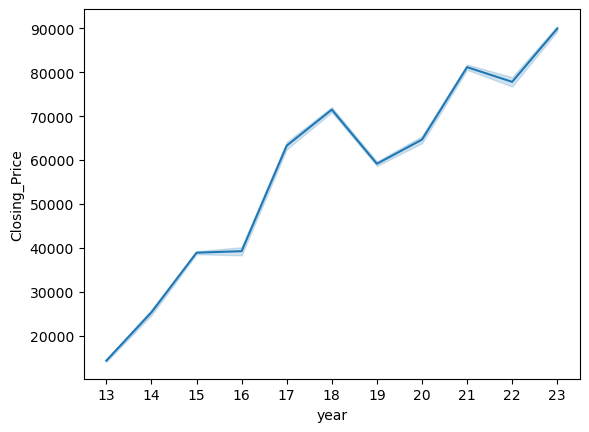

In [14]:
#lineplot x=year and y=closing price
sns.lineplot(x="year",y="Close",data=data)
plt.ylabel("Closing_Price")

<AxesSubplot:xlabel='Close', ylabel='Count'>

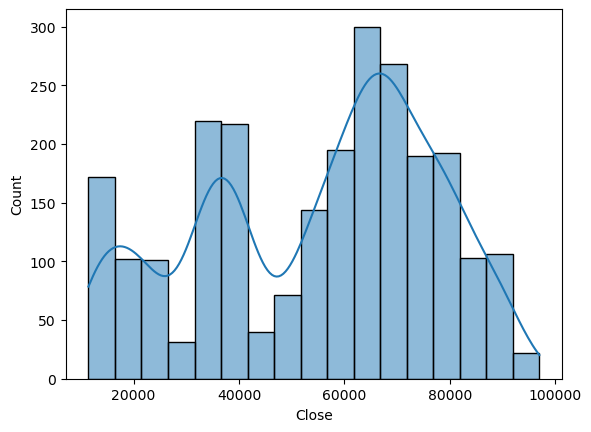

In [15]:
#histogram plot for visualizing the distribution of the closing price 
sns.histplot(data["Close"],kde=True)

<AxesSubplot:xlabel='month', ylabel='Close'>

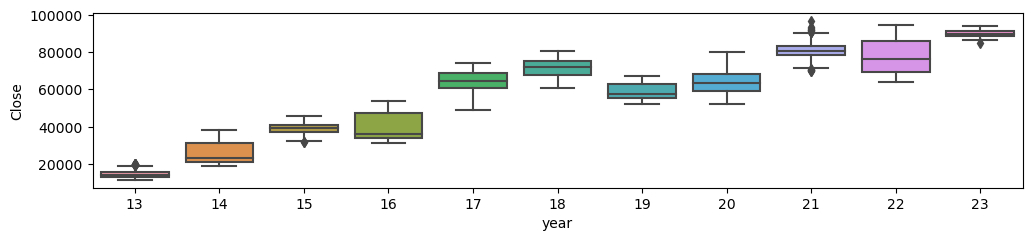

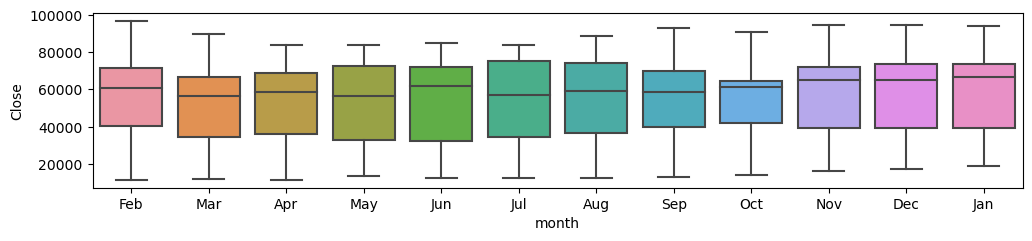

In [16]:
#boxplot with x=year,y=close price for visualizing the close price throughout years
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
sns.boxplot(x="year",y="Close",data=data)
#boxplot with x=month,y=close price for visualizing the close price throughout months
plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
sns.boxplot(x="month",y="Close",data=data)

<AxesSubplot:>

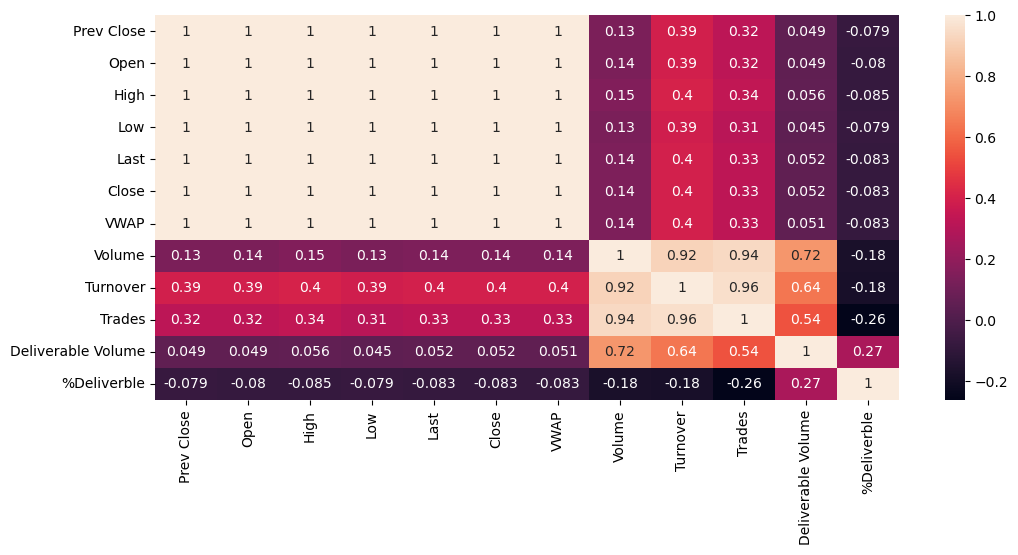

In [10]:
#heatmap visualizing correlation of the columns 
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)

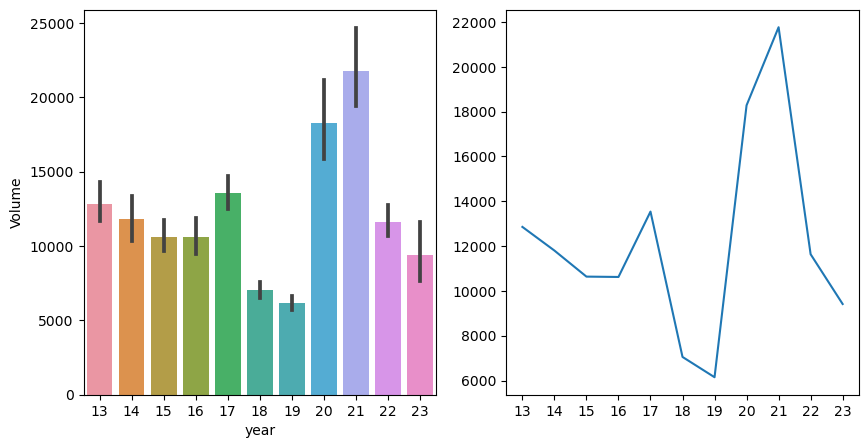

In [20]:
#barplot and line plot for volume across years
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x="year",y="Volume",data=data)
plt.subplot(1,2,2)
plt.plot(data.groupby("year")["Volume"].mean())

In [21]:
import talib as ta

In [22]:
#creating exponential moving average column taking last 100 previous records
data["ema_100"]=ta.EMA(data["Close"],100)

<AxesSubplot:xlabel='Date', ylabel='Close'>

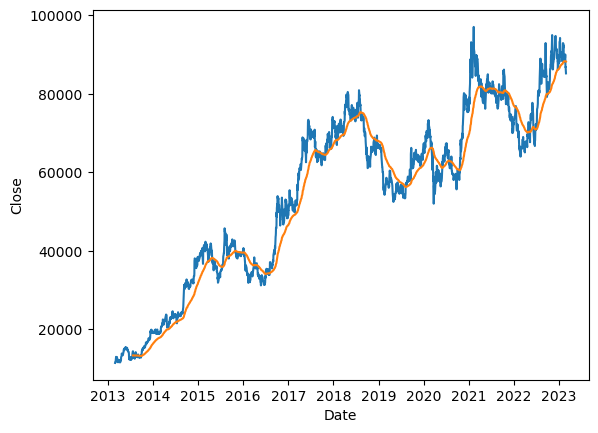

In [23]:
#TREND DIRECTION OVER A PERIOD OF TIME using exponential moving average
sns.lineplot(x="Date",y="Close",data=data)
sns.lineplot(x="Date",y="ema_100",data=data)

In [24]:
data.set_index(data.Date,inplace=True)

In [25]:
#creating relative strength index column
data["rsi"]=ta.RSI(data["Close"])

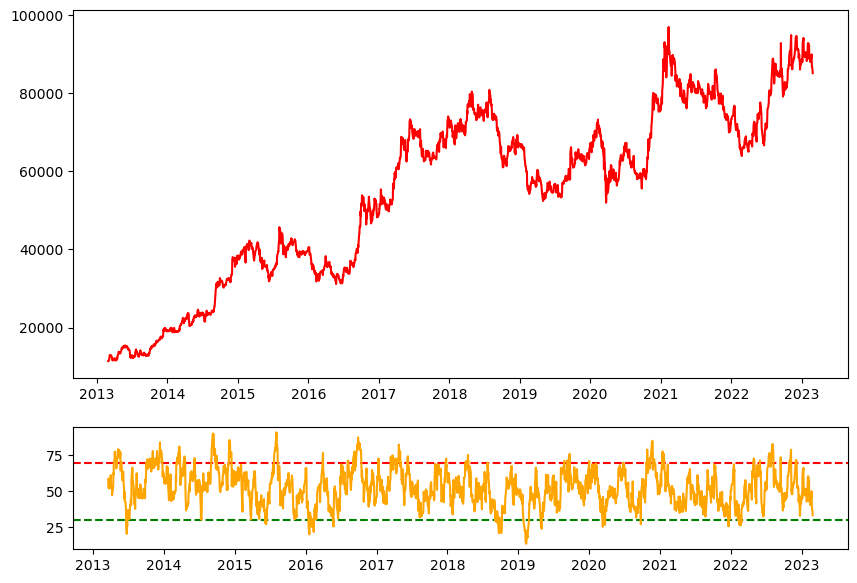

In [26]:
# evaluate overvalued or undervalued conditions in the price using relative strength index
fig,axs=plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]},figsize=(10,7))
axs[0].plot(data["Close"],color="red")
axs[1].axhline(y=70,color="r",linestyle="--")
axs[1].axhline(y=30,color="green",linestyle="--")
axs[1].plot(data["rsi"],color="orange")

In [27]:
import mplfinance as mpf

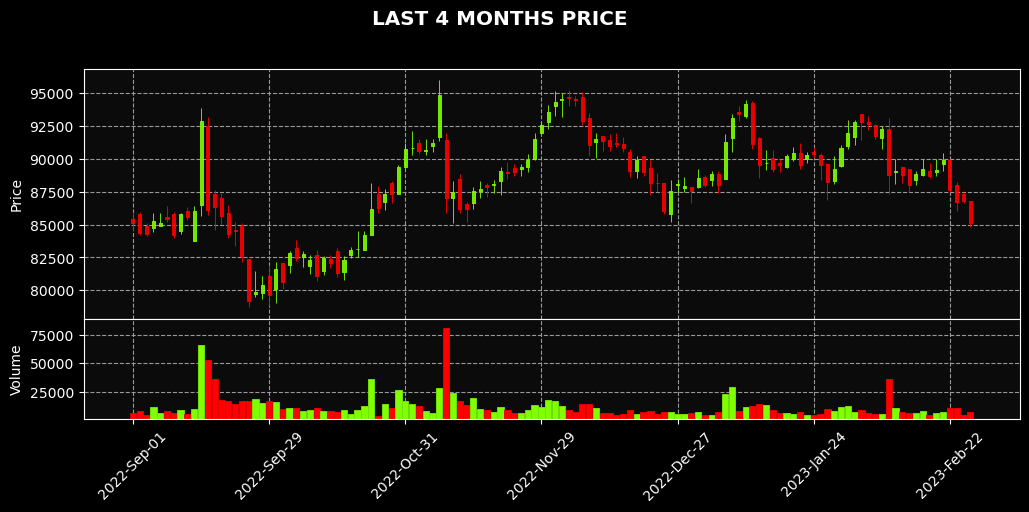

In [28]:
#candlestick visualization with volume from 2022-09 to 2023-02 
colors=mpf.make_marketcolors(up="#7FFF00",down="#ff0000",wick="inherit",edge="inherit",volume="inherit")
style=mpf.make_mpf_style(base_mpf_style="nightclouds",marketcolors=colors)
mpf.plot(data["2022-09":"2023-02"],type="candle",style=style,figsize=(13,5),volume=True,title="LAST 4 MONTHS PRICE")

In [29]:
df=pd.DataFrame(data["Close"])
df

Close
Date                
2013-02-28  11427.75
2013-03-01  11572.70
2013-03-04  11593.00
2013-03-05  11902.85
2013-03-06  12181.30
...              ...
2023-02-21  89957.20
2023-02-22  87658.30
2023-02-23  86730.85
2023-02-24  86800.70
2023-02-27  85143.10

[2474 rows x 1 columns]

In [30]:
import statsmodels.api as sm
import copy

In [31]:
dataframe=copy.deepcopy(df)

In [32]:
dataframe.reset_index(inplace=True)

In [36]:
dataframe.head(5)

Date     Close
0 2013-02-28  11427.75
1 2013-03-01  11572.70
2 2013-03-04  11593.00
3 2013-03-05  11902.85
4 2013-03-06  12181.30

In [38]:
dfm = dataframe.resample('M', on='Date').mean()

In [39]:
dfm.head(5)

Close
Date                    
2013-02-28  11427.750000
2013-03-31  12227.694737
2013-04-30  12457.477500
2013-05-31  14812.210870
2013-06-30  14012.085000

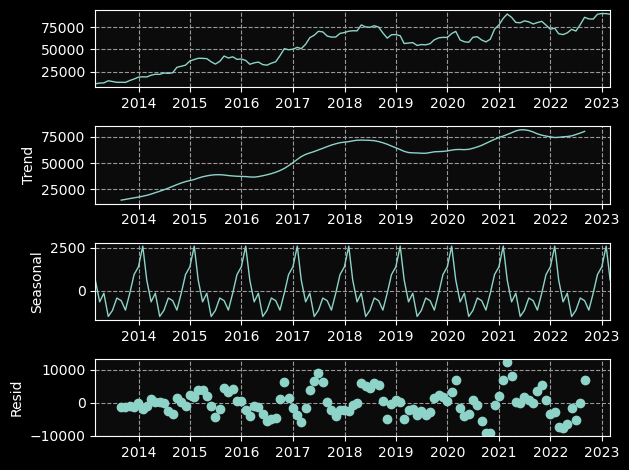

In [41]:
#stationarity check by visualizing the trend and seasonality
decomposition=sm.tsa.seasonal_decompose(dfm,model="additive",period=12)
fig=decomposition.plot()
plt.show()


# CHECKING FOR STATIONARITY OF DATA

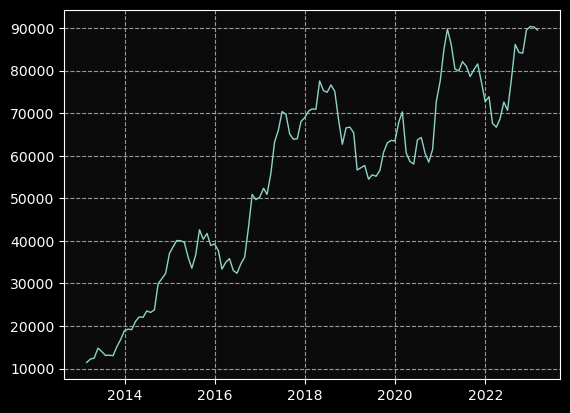

In [42]:
plt.plot(dfm)

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
fullertest=adfuller(dfm)
print("p value of adfuller test:",fullertest[1])

p value of adfuller test: 0.627167441465495


# TRYING TO MAKE DATA STATIONARY USING DIFFERENCING TECHNIQUE

In [46]:
dfm["diff1"]=dfm["Close"].diff(periods=1)
dfm.head(5)

Close        diff1
Date                                 
2013-02-28  11427.750000          NaN
2013-03-31  12227.694737   799.944737
2013-04-30  12457.477500   229.782763
2013-05-31  14812.210870  2354.733370
2013-06-30  14012.085000  -800.125870

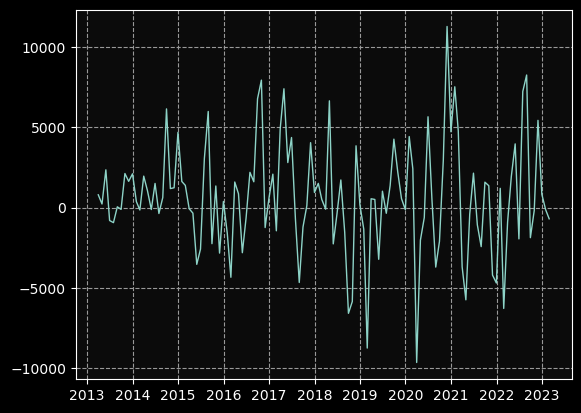

In [47]:
plt.plot(dfm["diff1"])

In [48]:
diff1_fullertest=adfuller(dfm["diff1"].dropna())
print("p value of adfuller test:",diff1_fullertest[1])

p value of adfuller test: 8.90769153436724e-12


p value < 0.05 the data is stationary 
p value > 0.05 the data is not stationary 

# THE DATA IS MADE STATIONARY BY DIFFERENCING (PERIODS=1)

In [49]:
import statsmodels.graphics.tsaplots as tsa_plots

D:\New folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


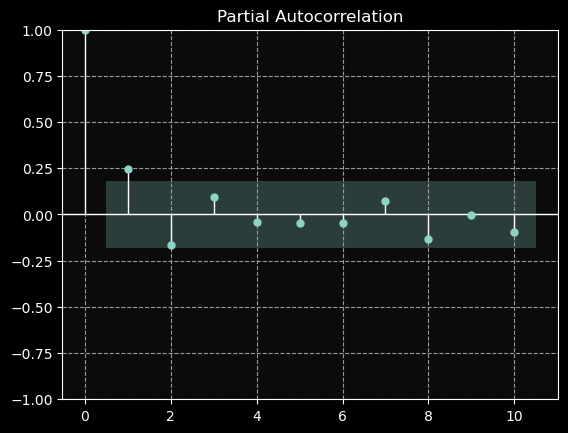

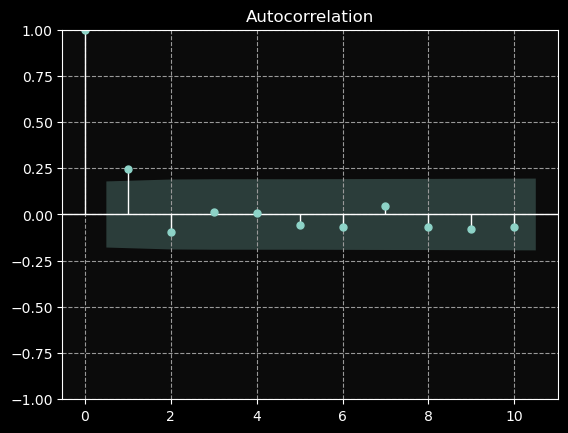

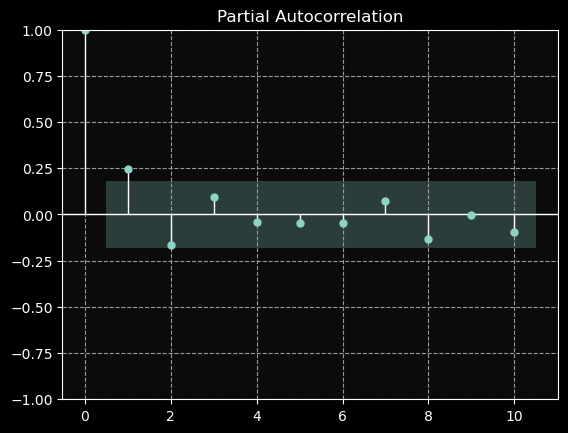

In [50]:
tsa_plots.plot_acf(dfm["diff1"].dropna(),lags=10)
tsa_plots.plot_pacf(dfm["diff1"].dropna(),lags=10)

In [51]:
df7=dfm.drop("diff1",axis=1)

In [52]:
df7.shape

(121, 1)

In [53]:
train2=df7.iloc[:100,:]
test2=df7.iloc[100:,:]

# ARIMA

In [54]:
import itertools

In [55]:
p=range(0,8)
q=range(0,8)
d=range(1,2)

In [56]:
pdq_combination=list(itertools.product(p,d,q))

In [57]:
pdq_combination

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
RMSE=[]
ORDER=[]

In [63]:
for pdq in pdq_combination:
        model=sm.tsa.arima.ARIMA(train2,order=pdq).fit()
        pred=model.predict(start=len(train2),end=(len(df7)-1))
        error=np.sqrt(mean_squared_error(test2,pred))
        ORDER.append(pdq)
        RMSE.append(error)

D:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found.

In [64]:
RES=pd.DataFrame({"order":ORDER,"RMSE":RMSE})

In [65]:
RES

order          RMSE
0   (0, 1, 0)   7493.708770
1   (0, 1, 1)   7534.007066
2   (0, 1, 2)   7552.459843
3   (0, 1, 3)   7498.446562
4   (0, 1, 4)   7634.000222
..        ...           ...
59  (7, 1, 3)   9375.168851
60  (7, 1, 4)   7814.388934
61  (7, 1, 5)   9359.305107
62  (7, 1, 6)   9491.825714
63  (7, 1, 7)  11142.519981

[64 rows x 2 columns]

In [66]:
RES["RMSE"].min()

7481.201594347643

In [67]:
RES[RES["RMSE"]==7481.201594347643]

order         RMSE
8  (1, 1, 0)  7481.201594

In [68]:
ARIMA_MODEL=sm.tsa.arima.ARIMA(train2,order=(1,1,0)).fit()

In [69]:
PREDICTIONS=ARIMA_MODEL.predict(start=len(train2),end=(len(df7)-1))

In [70]:
ERROR=np.sqrt(mean_squared_error(test2,PREDICTIONS))
ERROR

7481.201594347643

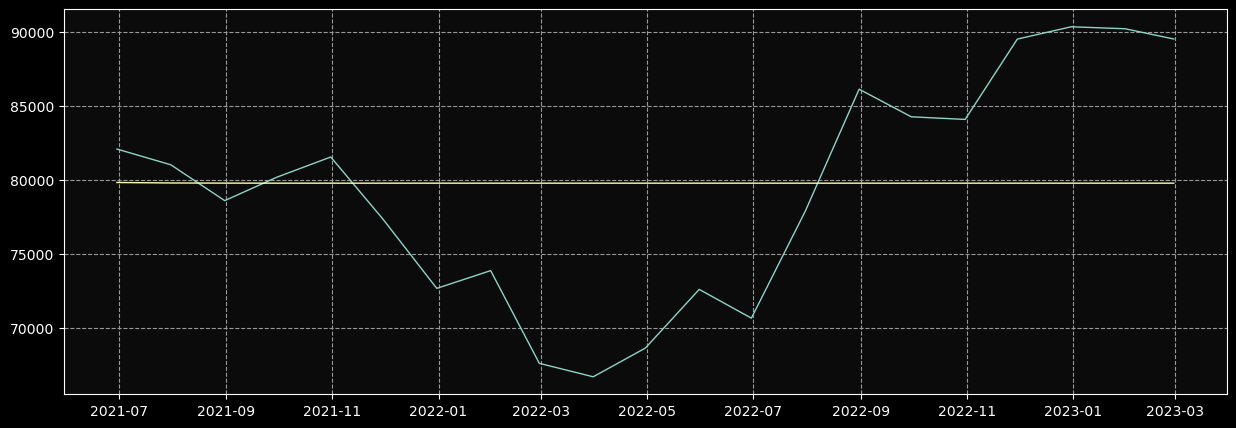

In [71]:
plt.figure(figsize=(15,5))
plt.plot(test2)
plt.plot(PREDICTIONS)

# ARIMA FAILED TO CAPTURE THE SEASONALITY OF DATA

# BUILDING SARIMAX FOR CAPTURING SEASONALITY

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [166]:
df12=df7["Close"].diff(periods=12)

In [108]:
df12

Date
2013-02-28             NaN
2013-03-31             NaN
2013-04-30             NaN
2013-05-31             NaN
2013-06-30             NaN
                  ...     
2022-10-31     2540.212368
2022-11-30    12168.203452
2022-12-31    17688.391700
2023-01-31    16353.953214
2023-02-28    21930.682632
Freq: M, Name: Close, Length: 121, dtype: float64

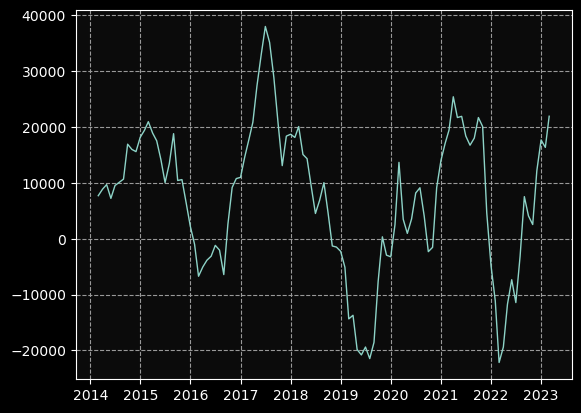

In [109]:
plt.plot(df12)

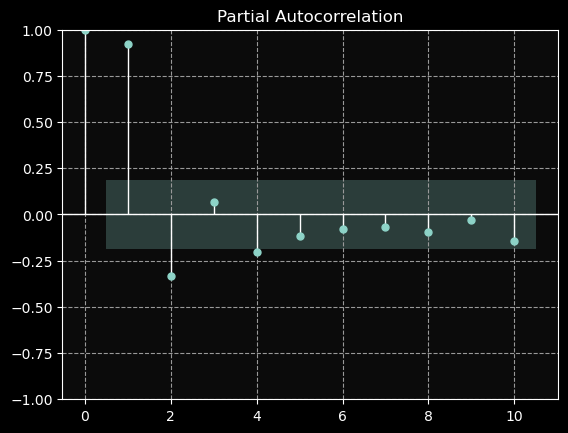

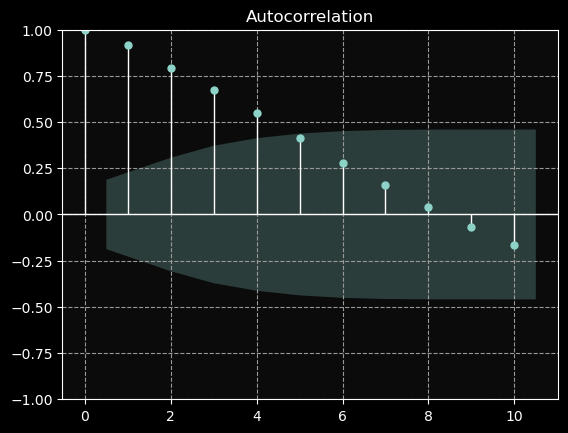

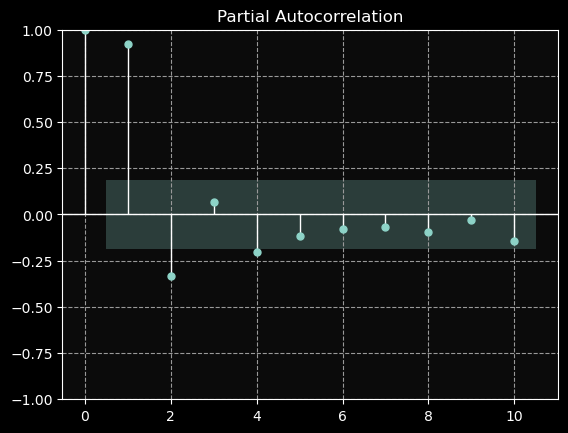

In [167]:
tsa_plots.plot_acf(df12.dropna(),lags=10)
tsa_plots.plot_pacf(df12.dropna(),lags=10)

In [110]:
fullertest12=adfuller(df12.dropna())
print("p value of adfuller test:",fullertest12[1])

p value of adfuller test: 0.069355116485628


In [111]:
P=range(0,5)
M=range(10,13)
Q=range(0,5)
D=range(1,4)

In [112]:
PDQM_combination=list(itertools.product(P,D,Q,M))

In [113]:
PDQM_combination

[(0, 1, 0, 10),
 (0, 1, 0, 11),
 (0, 1, 0, 12),
 (0, 1, 1, 10),
 (0, 1, 1, 11),
 (0, 1, 1, 12),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 2, 12),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 3, 12),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 4, 12),
 (0, 2, 0, 10),
 (0, 2, 0, 11),
 (0, 2, 0, 12),
 (0, 2, 1, 10),
 (0, 2, 1, 11),
 (0, 2, 1, 12),
 (0, 2, 2, 10),
 (0, 2, 2, 11),
 (0, 2, 2, 12),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 3, 12),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 4, 12),
 (0, 3, 0, 10),
 (0, 3, 0, 11),
 (0, 3, 0, 12),
 (0, 3, 1, 10),
 (0, 3, 1, 11),
 (0, 3, 1, 12),
 (0, 3, 2, 10),
 (0, 3, 2, 11),
 (0, 3, 2, 12),
 (0, 3, 3, 10),
 (0, 3, 3, 11),
 (0, 3, 3, 12),
 (0, 3, 4, 10),
 (0, 3, 4, 11),
 (0, 3, 4, 12),
 (1, 1, 0, 10),
 (1, 1, 0, 11),
 (1, 1, 0, 12),
 (1, 1, 1, 10),
 (1, 1, 1, 11),
 (1, 1, 1, 12),
 (1, 1, 2, 10),
 (1, 1, 2, 11),
 (1, 1, 2, 12),
 (1, 1, 3, 10),
 (1, 1, 3, 11),
 (1, 1, 3, 12),
 (1, 1, 4, 10),
 (1, 1, 4, 11),
 (1, 1, 4, 12),
 (1, 2, 0, 10),
 (1, 2, 0, 11),
 (1, 2, 

In [114]:
RRMSE=[]
OORDER=[]

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [117]:
for PDQM in PDQM_combination:
    FINAL_MODEL = SARIMAX(train2,order=(1,1,0),seasonal_order=PDQM).fit()
    PRED_SARIMA=FINAL_MODEL.predict(start=len(train2),end=(len(df7)-1))
    ERROR_SARIMA=np.sqrt(mean_squared_error(PRED_SARIMA,test2))
    RRMSE.append(ERROR_SARIMA)
    OORDER.append(PDQM)

LinAlgError: LU decomposition error.

In [118]:
res=pd.DataFrame({"order":OORDER,"RMSE":RRMSE})

In [119]:
res["RMSE"].min()

5783.912735106232

In [120]:
res[res["RMSE"]==5783.912735106232]

order         RMSE
142  (3, 1, 2, 11)  5783.912735

In [149]:
FINAL_MODEL = SARIMAX(df7,order=(1,1,0),seasonal_order=(3,1,2,11)).fit()

In [156]:
PRED_SARIMA=FINAL_MODEL.predict(start=1,end=(len(df7)-1))

In [157]:
    dfpredsarima=pd.DataFrame(PRED_SARIMA)

In [159]:
dfpredsarima

predicted_mean
Date                      
2013-03-31    14542.664189
2013-04-30    12487.074625
2013-05-31    12524.676036
2013-06-30    15474.128767
2013-07-31    13790.900210
...                    ...
2022-10-31    83807.839103
2022-11-30    86953.218740
2022-12-31    90727.680262
2023-01-31    89258.341722
2023-02-28    90324.203634

[120 rows x 1 columns]

In [185]:
forecast=result_model.forecast(12)

In [186]:
df_forecast=pd.DataFrame(forecast)

In [187]:
df_forecast.head()

predicted_mean
2023-03-31    91145.330370
2023-04-30    90943.532485
2023-05-31    90658.573271
2023-06-30    90598.164283
2023-07-31    91303.647695

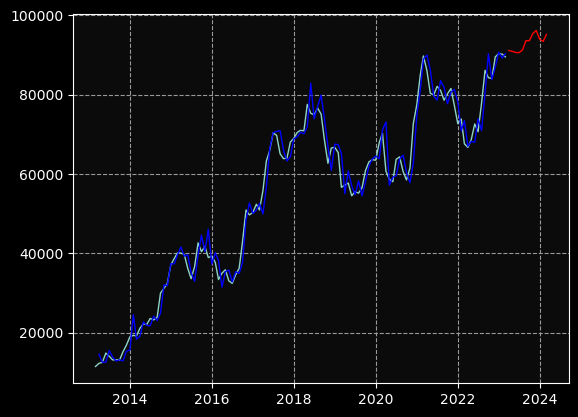

In [188]:
plt.plot(df7)
plt.plot(dfpredsarima,color="blue")
plt.plot(df_forecast,color="red")

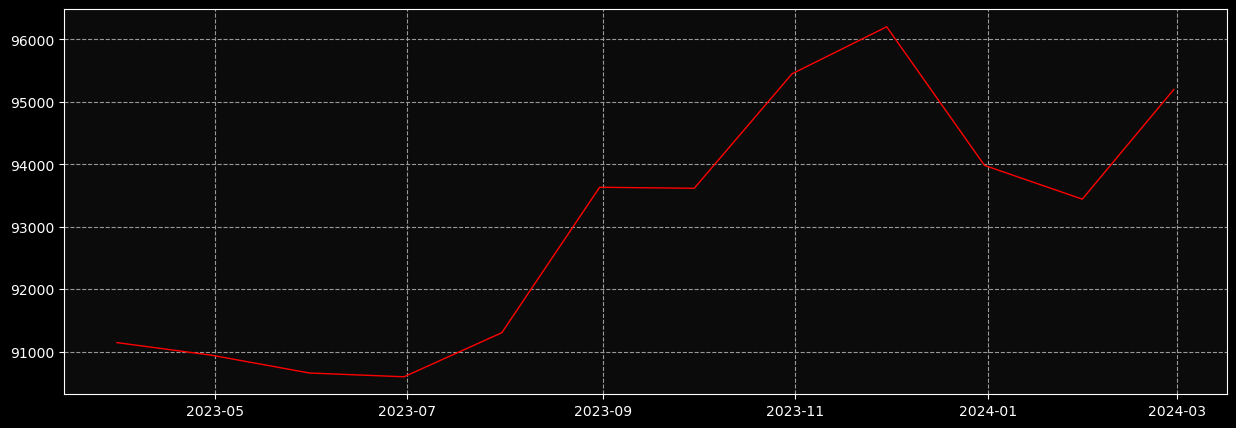

In [190]:
plt.figure(figsize=(15,5))
plt.plot(df_forecast,color="red")

# FBPROPHET

In [33]:
DF=copy.deepcopy(dataframe)

In [34]:
DF.rename({"Date":"ds","Close":"y"},axis=1,inplace=True)

In [35]:
DF.head(5)

ds         y
0 2013-02-28  11427.75
1 2013-03-01  11572.70
2 2013-03-04  11593.00
3 2013-03-05  11902.85
4 2013-03-06  12181.30

In [36]:
DF.shape

(2474, 2)

In [37]:
last=DF[len(DF)-40:]

In [38]:
last.shape

(40, 2)

In [39]:
first=DF[:-40]

In [40]:
first.shape

(2434, 2)

In [41]:
import prophet

In [42]:
from prophet import Prophet

In [43]:
fbp=Prophet(daily_seasonality=True,seasonality_mode='additive',seasonality_prior_scale=20)
fbp.fit(first)
future=fbp.make_future_dataframe(periods=365)
forecast=fbp.predict(future)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [44]:
from prophet.plot import plot_plotly,plot_components_plotly

In [45]:
import plotly.io as pio
pio.renderers.default='notebook'

In [46]:
plot_plotly(fbp,forecast)

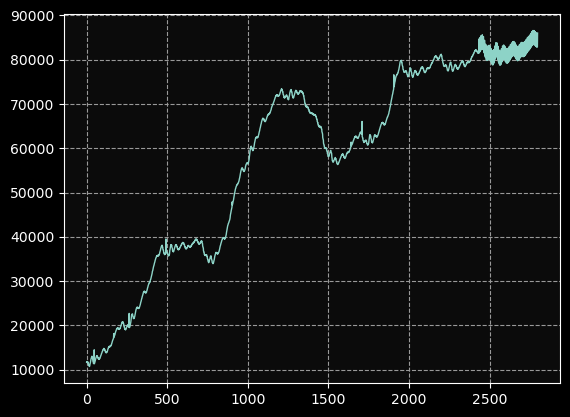

In [56]:
plt.plot(forecast["yhat"])

In [47]:
last

ds         y
2434 2023-01-02  88051.20
2435 2023-01-03  88876.15
2436 2023-01-04  88012.25
2437 2023-01-05  91275.80
2438 2023-01-06  93141.50
2439 2023-01-09  93447.60
2440 2023-01-10  94163.95
2441 2023-01-11  91142.00
2442 2023-01-12  89518.25
2443 2023-01-13  89712.95
2444 2023-01-16  89228.35
2445 2023-01-17  89526.75
2446 2023-01-18  90196.85
2447 2023-01-19  90484.00
2448 2023-01-20  89557.00
2449 2023-01-23  90280.35
2450 2023-01-24  90414.50
2451 2023-01-25  89571.75
2452 2023-01-27  88261.10
2453 2023-01-30  89263.90
2454 2023-01-31  90869.40
2455 2023-02-01  91961.45
2456 2023-02-02  92817.35
2457 2023-02-03  92853.35
2458 2023-02-06  92677.85
2459 2023-02-07  91739.85
2460 2023-02-08  92275.65
2461 2023-02-09  88813.05
2462 2023-02-10  89070.90
2463 2023-02-13  88803.90
2464 2023-02-14  88050.00
2465 2023-02-15  88855.45
2466 2023-02-16  89215.80
2467 2023-02-17  88739.70
2468 2023-02-20  89181.10
2469 2023-02-21  89957.20
2470 2023-02-22  87658.30
2471 2023-02-23  86730.85
2472 2023-02-24  86800.70
2473 2023-02-27  85143.10

In [48]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2013-02-28  11540.566967   5829.156091  18012.561889  11540.566967   
1    2013-03-01  11557.838544   5753.599992  17331.298893  11557.838544   
2    2013-03-04  11609.653276   5714.288024  17152.208400  11609.653276   
3    2013-03-05  11626.924853   6417.966598  17433.976241  11626.924853   
4    2013-03-06  11644.196430   6379.611599  17743.573731  11644.196430   
...         ...           ...           ...           ...           ...   
2794 2023-12-26  81084.129467  68918.458850  94566.949987  69244.126808   
2795 2023-12-27  81087.844084  69936.181037  95404.620076  69202.338295   
2796 2023-12-28  81091.558700  69606.985680  96547.174606  69161.246672   
2797 2023-12-29  81095.273317  69215.648395  95358.674198  69121.212058   
2798 2023-12-30  81098.987934  72982.817330  98845.246864  69081.177444   

       trend_upper  additive_terms  additive_terms_lower  \
0     11540.566967      100.679435            100.679435   
1     11557.838544      236.265940            236.265940   
2     11609.653276       79.482128             79.482128   
3     11626.924853      133.330047            133.330047   
4     11644.196430      105.174189            105.174189   
...            ...             ...                   ...   
2794  91854.466939     1778.352198           1778.352198   
2795  91883.791561     1757.178025           1757.178025   
2796  91910.521577     1763.103091           1763.103091   
2797  91937.251594     1880.134704           1880.134704   
2798  91963.981610     4909.699962           4909.699962   

      additive_terms_upper       daily  ...       weekly  weekly_lower  \
0               100.679435  952.585765  ...  -589.022074   -589.022074   
1               236.265940  952.585765  ...  -473.769486   -473.769486   
2                79.482128  952.585765  ...  -653.570045   -653.570045   
3               133.330047  952.585765  ...  -590.719276   -590.719276   
4               105.174189  952.585765  ...  -600.087500   -600.087500   
...                    ...         ...  ...          ...           ...   
2794           1778.352198  952.585765  ...  -590.719276   -590.719276   
2795           1757.178025  952.585765  ...  -600.087500   -600.087500   
2796           1763.103091  952.585765  ...  -589.022074   -589.022074   
2797           1880.134704  952.585765  ...  -473.769486   -473.769486   
2798           4909.699962  952.585765  ...  2546.951742   2546.951742   

      weekly_upper       yearly  yearly_lower  yearly_upper  \
0      -589.022074  -262.884256   -262.884256   -262.884256   
1      -473.769486  -242.550339   -242.550339   -242.550339   
2      -653.570045  -219.533592   -219.533592   -219.533592   
3      -590.719276  -228.536442   -228.536442   -228.536442   
4      -600.087500  -247.324076   -247.324076   -247.324076   
...            ...          ...           ...           ...   
2794   -590.719276  1416.485708   1416.485708   1416.485708   
2795   -600.087500  1404.679760   1404.679760   1404.679760   
2796   -589.022074  1399.539400   1399.539400   1399.539400   
2797   -473.769486  1401.318425   1401.318425   1401.318425   
2798   2546.951742  1410.162454   1410.162454   1410.162454   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
2794                   0.0                         0.0   
2795                   0.0                         0.0   
2796                   0.0                         0.0   
2797                   0.0                         0.0   
2798                   0.0                         0.0   

      multiplicative_terms_upper          yhat  

In [49]:
predicted_fbp=pd.DataFrame(forecast[2436:2493][["ds","yhat"]])

In [50]:
predicted_fbp

ds          yhat
2436 2023-01-02  81540.570607
2437 2023-01-03  81644.891977
2438 2023-01-04  81682.862893
2439 2023-01-05  81746.524442
2440 2023-01-06  81918.901828
2441 2023-01-07  85000.438152
2442 2023-01-08  82877.268788
2443 2023-01-09  81928.768458
2444 2023-01-10  82057.518742
2445 2023-01-11  82113.493220
2446 2023-01-12  82188.128747
2447 2023-01-13  82363.935563
2448 2023-01-14  85440.944093
2449 2023-01-15  83304.991315
2450 2023-01-16  82335.278494
2451 2023-01-17  82434.347678
2452 2023-01-18  82452.273863
2453 2023-01-19  82480.741055
2454 2023-01-20  82602.654639
2455 2023-01-21  85618.587732
2456 2023-01-22  83415.064203
2457 2023-01-23  82372.110049
2458 2023-01-24  82393.220479
2459 2023-01-25  82329.539627
2460 2023-01-26  82273.921201
2461 2023-01-27  82310.522669
2462 2023-01-28  85241.230884
2463 2023-01-29  82953.922159
2464 2023-01-30  81829.988872
2465 2023-01-31  81774.280404
2466 2023-02-01  81639.255861
2467 2023-02-02  81519.017432
2468 2023-02-03  81498.877601
2469 2023-02-04  84381.758728
2470 2023-02-05  82056.428644
2471 2023-02-06  80905.004959
2472 2023-02-07  80832.876498
2473 2023-02-08  80692.839853
2474 2023-02-09  80579.120441
2475 2023-02-10  80576.931671
2476 2023-02-11  83488.871120
2477 2023-02-12  81203.157597
2478 2023-02-13  80101.141925
2479 2023-02-14  80087.239891
2480 2023-02-15  80013.085254
2481 2023-02-16  79971.571961
2482 2023-02-17  80046.438862
2483 2023-02-18  83038.695335
2484 2023-02-19  80834.891134
2485 2023-02-20  79814.662631
2486 2023-02-21  79880.703130
2487 2023-02-22  79882.954307
2488 2023-02-23  79912.687077
2489 2023-02-24  80052.124235
2490 2023-02-25  83100.902375
2491 2023-02-26  80944.375508
2492 2023-02-27  79961.191657

In [51]:
actvspre=last.merge(predicted_fbp, on='ds', how='left')

In [52]:
actvspre

ds         y          yhat
0  2023-01-02  88051.20  81540.570607
1  2023-01-03  88876.15  81644.891977
2  2023-01-04  88012.25  81682.862893
3  2023-01-05  91275.80  81746.524442
4  2023-01-06  93141.50  81918.901828
5  2023-01-09  93447.60  81928.768458
6  2023-01-10  94163.95  82057.518742
7  2023-01-11  91142.00  82113.493220
8  2023-01-12  89518.25  82188.128747
9  2023-01-13  89712.95  82363.935563
10 2023-01-16  89228.35  82335.278494
11 2023-01-17  89526.75  82434.347678
12 2023-01-18  90196.85  82452.273863
13 2023-01-19  90484.00  82480.741055
14 2023-01-20  89557.00  82602.654639
15 2023-01-23  90280.35  82372.110049
16 2023-01-24  90414.50  82393.220479
17 2023-01-25  89571.75  82329.539627
18 2023-01-27  88261.10  82310.522669
19 2023-01-30  89263.90  81829.988872
20 2023-01-31  90869.40  81774.280404
21 2023-02-01  91961.45  81639.255861
22 2023-02-02  92817.35  81519.017432
23 2023-02-03  92853.35  81498.877601
24 2023-02-06  92677.85  80905.004959
25 2023-02-07  91739.85  80832.876498
26 2023-02-08  92275.65  80692.839853
27 2023-02-09  88813.05  80579.120441
28 2023-02-10  89070.90  80576.931671
29 2023-02-13  88803.90  80101.141925
30 2023-02-14  88050.00  80087.239891
31 2023-02-15  88855.45  80013.085254
32 2023-02-16  89215.80  79971.571961
33 2023-02-17  88739.70  80046.438862
34 2023-02-20  89181.10  79814.662631
35 2023-02-21  89957.20  79880.703130
36 2023-02-22  87658.30  79882.954307
37 2023-02-23  86730.85  79912.687077
38 2023-02-24  86800.70  80052.124235
39 2023-02-27  85143.10  79961.191657

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
rmse_fbp=np.sqrt(mean_squared_error(actvspre["y"],actvspre["yhat"]))
rmse_fbp

8781.639197363358